I am trying to refactor the the GAHelpers and make a single set of files that make it easy to add/remove algorithms. Where we are changing things in only one place. When complete this should replace some/all of the following:

- AlgorithmParams.py
- AlgorithmSpace.py 
- RunClass.py

Maybe a few others.

# Functions for working with the images in Jupyter

In [1]:
def showtwo(img, img2):
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(1,2,1)
    ax.imshow(img)
    ax = fig.add_subplot(1,2,2)
    ax.imshow(img2)

In [2]:
def showthree(im, img, img2):
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(1,3,1)
    ax.imshow(im)
    ax = fig.add_subplot(1,3,2)
    ax.imshow(img)
    ax = fig.add_subplot(1,3,3)
    ax.imshow(img2)

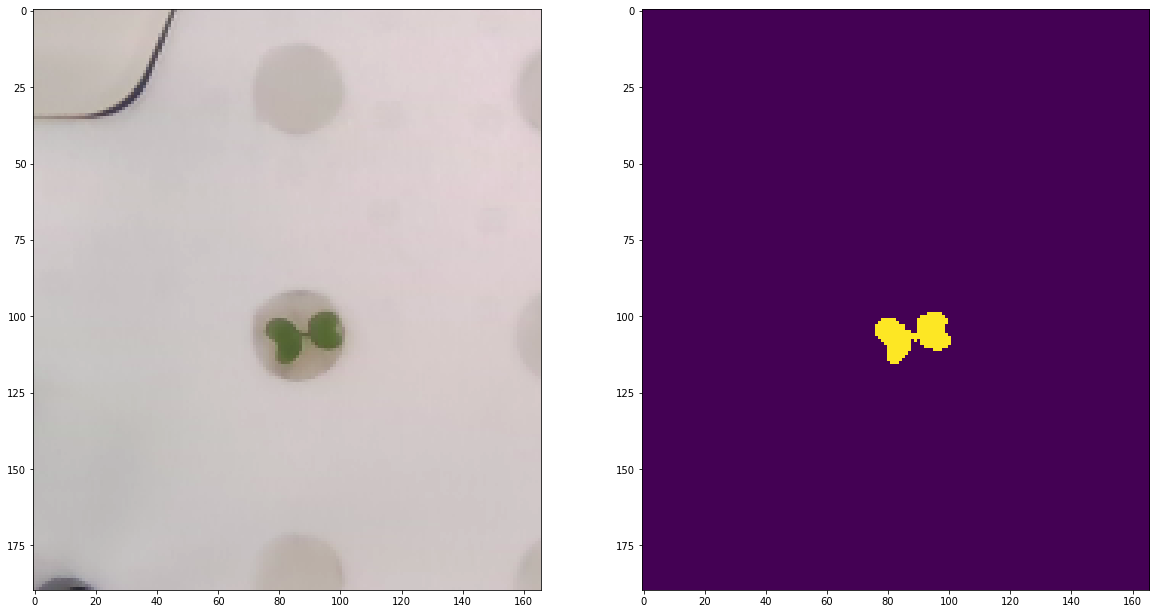

In [3]:
%matplotlib inline
import matplotlib.pylab as plt
import imageio
img = imageio.imread('Image_data/Coco_2017_unlabeled//rgbd_plant/rgb_00_000_00.png')
gmask = imageio.imread('Image_data/Coco_2017_unlabeled/rgbd_new_label/label_00_000_000.png')
from skimage import color
gmask = color.rgb2gray(gmask)
showtwo(img, gmask)

# New main program split up into a class to make it easy to run.

In [4]:
from see import GeneticSearch

In [5]:
ee = GeneticSearch.Evolver(img, gmask)

In [6]:
#ee.run(startfile="test.json", checkpoint="checkpoint.json")

In [7]:
population = ee.run(4, checkpoint="checkpoint.json")

Writting population to 0_checkpoint.json
Running Algorithm FB
Parsing Parameter List for 25 parameters
Calculating Fitness
Running Algorithm CT
Parsing Parameter List for 25 parameters
Calculating Fitness
Running Algorithm MCV
Parsing Parameter List for 25 parameters
Calculating Fitness
Running Algorithm CT
Parsing Parameter List for 25 parameters
Calculating Fitness
Running Algorithm WS
Parsing Parameter List for 25 parameters
Calculating Fitness
img1 not in grayscale
Running Algorithm FB
Parsing Parameter List for 25 parameters
Calculating Fitness
Running Algorithm AC
Parsing Parameter List for 25 parameters
Calculating Fitness
img1 not in grayscale
Running Algorithm CT
Parsing Parameter List for 25 parameters
Calculating Fitness
Running Algorithm WS
Parsing Parameter List for 25 parameters
Calculating Fitness
img1 not in grayscale
Running Algorithm WS
Parsing Parameter List for 25 parameters
Calculating Fitness
img1 not in grayscale
Generation:  0
 Min:  2986023519697135.0
 Max:  9.

In [ ]:
import deap


In [ ]:
import json

In [ ]:
filename='1_checkpoint.json'
print(f"Reading population to {filename}")
with open(filename, 'r') as infile:
    test2 = json.load(infile)

In [ ]:
filename='listfile.json'
print(f"Writting population to {filename}")
with open(filename, 'w') as outfile:
    json.dump(test, outfile)

In [ ]:
for p in range(len(test1)):
    print(test1[p])
    

In [ ]:
for p in range(len(test2)):
    print(test2[p])

# Playing with the parameters and individual classes.  

In [8]:
from see import Segmentors

In [ ]:
Segmentors.algorithmspace

In [ ]:
tot = len(Segmentors.algorithmspace)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(5,5,1)
ax.imshow(img)
for index, segkey in enumerate(Segmentors.algorithmspace):
    ax = fig.add_subplot(5,5,index+2)
    seg = Segmentors.algorithmspace[segkey]()
    mask = seg.evaluate(img.copy())
    ax.imshow(mask)
    plt.title(segkey)

Test the parameter parser

In [ ]:
seg = Segmentors.MorphGeodesicActiveContour()
seg.params['alpha']  = 333
seg.params['sigma'] = 0.3
seg.params['iterations'] = 10
seg.params['init_level_set_morph'] = 'circle'
seg.params['smoothing'] = 4
seg.params['balloon'] = -10
mask = seg.evaluate(img)
showthree(img, mask, gmask)

In [ ]:
seg = Segmentors.ColorThreshold()
seg.params['channel'] = 1
seg.params['mu'] = 0.4
seg.params['sigma'] = 0.6
mask = seg.evaluate(img)
showthree(img, mask, gmask)

In [ ]:
seg = Segmentors.Watershed()
seg.params['compactness'] = 10
mask = seg.evaluate(img)
showthree(img, mask, gmask)

In [ ]:
seg = Segmentors.Slic()
seg.params['n_segments'] = 15
seg.params['compactness'] = 1
seg.params['iterations']= 20
seg.params['sigma'] = 5
print(f"({seg.params['n_segments']}, {seg.params['compactness']}, {seg.params['iterations']}, {seg.params['sigma']})")
mask = seg.evaluate(img)
showthree(img, mask, gmask)

In [ ]:
seg = Segmentors.QuickShift()
#kernel_size=3, max_dist=6, ratio=0.5)
seg.params['kernel_size'] = 5
seg.params['max_dist'] = 60
seg.params['sigma'] = 0.5
seg.params['seed'] = 1
mask = seg.evaluate(img)
showthree(img, mask, gmask)

In [ ]:
seg = Segmentors.Felzenszwalb()
print(f"{seg.params['algorithm']} = ({seg.params['scale']}, {seg.params['sigma']}, {seg.params['min_size']})")
mask = seg.evaluate(img)
showthree(img, mask, gmask)

In [ ]:
params = ['FB', 515,  0.566, 984, 0.09, 92, 436, 10, 0.59, 4, 841, 134, 8, 0.01, 0.85, [2, 1], 0.0, 'checkerboard', 'circle', 1, 895, -49, 105, 121, 2]
seg = Segmentors.algoFromParams(params)
print(f"{seg.params['algorithm']} = ({seg.params['scale']}, {seg.params['sigma']}, {seg.params['min_size']})")
mask = seg.evaluate(img)
plt.imshow(mask)

In [ ]:
[fitness, mask] = Segmentors.runAlgo(img, gmask, params, returnMask=True)
showtwo(mask, gmask)
plt.title(fitness)

In [ ]:
p2 = ['FB', 66, 0.667, 889, 0.05, 580, 74, 10, 0.34, 365, 191, 134, 1, 0.1, 0.72, [1, 2], 4.3, 'checkerboard', 'circle', 4, 649, -49, 148, 23, 2]
[fitness, mask] = Segmentors.runAlgo(img, gmask, p2, returnMask=True)
showtwo(mask, gmask)
plt.title(fitness)

In [ ]:
p2 = ['FB', 690, 0.457, 656, 0.03, 569, 557, 10, 0.5, 453, 797, 134, 3, 100, 0.82, [1, 2], 7.5, 'disk', 'circle', 1, 868, -49
, 167, 91, 2]
[fitness, mask] = Segmentors.runAlgo(img, gmask, p2, returnMask=True)
showtwo(mask, gmask)
plt.title(fitness)

In [ ]:
p2 = ['AC', 535, 0.203, 743, 0.09, 932, 740, 10, 0.95, 653, 855, 134, 2, 0.0001, 0.83, [1, 2], 1.4, 'disk', 'checkerboard', 4, 254, -49, 116, 7, 2]
[fitness, mask] = Segmentors.runAlgo(img, gmask, p2, returnMask=True)
showtwo(mask, gmask)
plt.title(fitness)

In [ ]:
print(seg)

In [ ]:
Segmentors.FitnessFunction(mask,mask)

In [ ]:
p2 = ['SC', 6754, 0.966, 7442, 0.06, 9630, 1340, 10, 0.1, 6547, 9204, 134, 5, 10, 0.45, (1, 1), 6.3, 'small disk', 'checkerboard', 1, 695, 49, 0.0, 0.0, 0.0]
[fitness, mask] = Segmentors.runAlgo(img, gmask, p2, returnMask=True)
showtwo(mask, gmask)
plt.title(fitness)

Running Algorithm CT
Parsing Parameter List for 25 parameters
Calculating Fitness


Text(0.5, 1.0, '[34.438382383181924]')

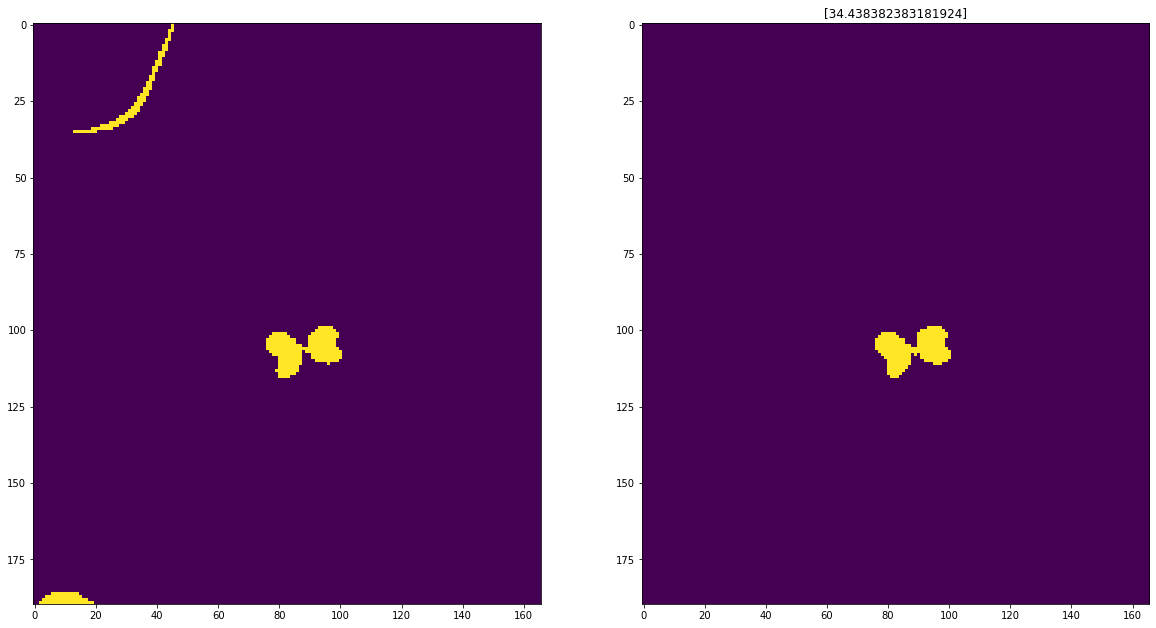

In [9]:
p2 = ['CT', 6560, 0.046, 5877, 0.03, 5469, 4925, 10, 0.62, 5231, 1695, 134, 5, 100, 0.59, (1, 1), 4.9, 'checkerboard', 'circle', 1, 8491, -39, 0.0, 0.0, 0.0]
[fitness, mask] = Segmentors.runAlgo(img, gmask, p2, returnMask=True)
showtwo(mask, gmask)
plt.title(fitness)